<a href="https://colab.research.google.com/github/yhumadlaa/Exploratory-Data-Analysis_Pre-Processing-Data-and-Modelling/blob/main/EDA%2C_Pre_Processing%2C_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from imblearn.pipeline import make_pipeline as imbl_pipe
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from scipy.stats import shapiro

In [ ]:
read_file1 = pd.read_csv(r'/training_set_features.csv')
read_file2 = pd.read_csv(r'/training_set_labels.csv')

In [ ]:
df1 = read_file1
df1

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [ ]:
df2 = read_file2
df2

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [ ]:
#menggabungkan data
merged_df = pd.concat([df1, df2], axis=1)
merged_df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,3,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,26702,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,26703,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,26704,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,26705,0,0


## **Exploratory Data Analysis (EDA)**
Tahap EDA bertujuan untuk memahami karakteristik data mentah secara keseluruhan dan membantu dalam menentukan langkah-langkah selanjutnya dalam proses analisis.

In [ ]:
# Menampilkan tipe data untuk setiap kolom
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [ ]:
merged_df.columns.values

array(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1',
       'doctor_recc_seasonal', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'respondent_id', 'h1n1_vaccine',
       'seasonal_vaccine'], dtype=object)

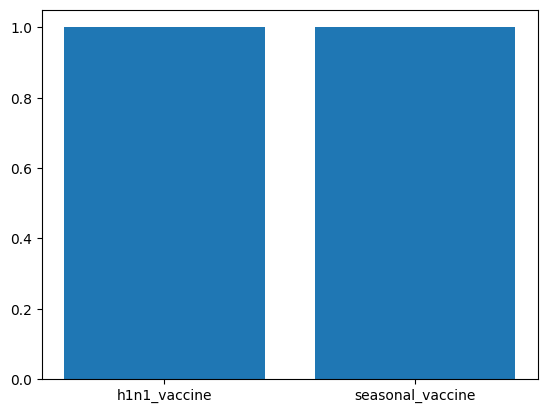

In [ ]:
#PENGECEKAN KESEIMBANGAN DATA TARGET

target_data = ['h1n1_vaccine', 'seasonal_vaccine']  # Ganti dengan data target multioutput Anda

# Menghitung jumlah kategori pada output pertama
count_output1 = target_data.count('h1n1_vaccine')

# Menghitung jumlah kategori pada output kedua
count_output2 = target_data.count('seasonal_vaccine')

# Label kategori
labels = ['h1n1_vaccine', 'seasonal_vaccine']

# Jumlah pengamatan dalam setiap kategori
counts = [count_output1, count_output2]

# Membuat bar plot
fig, ax = plt.subplots()
ax.bar(labels, counts)

# Menampilkan plot
plt.show()


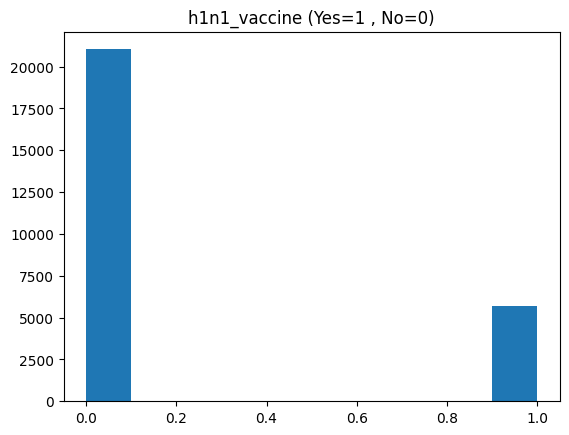

In [ ]:
#Menghitung keseimbangan jumlah kelas data target 'h1n1_vaccine'
merged_df.describe()
plt.hist(merged_df['h1n1_vaccine'])
plt.title('h1n1_vaccine (Yes=1 , No=0)')
plt.show()

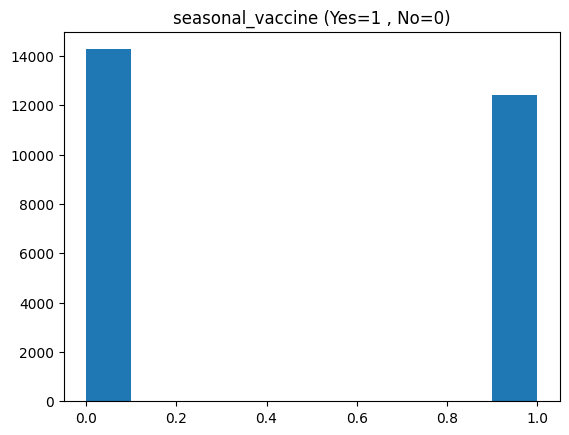

In [ ]:
#Menghitung keseimbangan jumlah kelas data target 'seasonal_vaccine'
merged_df.describe()
plt.hist(merged_df['seasonal_vaccine'])
plt.title('seasonal_vaccine (Yes=1 , No=0)')
plt.show()

In [ ]:
#Mengelompokkan Data Numerik
nums = ['h1n1_concern', 'h1n1_knowledge', 
        'behavioral_antiviral_meds', 'behavioral_avoidance',
        'behavioral_face_mask', 'behavioral_wash_hands',
        'behavioral_large_gatherings', 'behavioral_outside_home',
        'behavioral_touch_face', 'doctor_recc_h1n1',
        'doctor_recc_seasonal', 'chronic_med_condition',
        'child_under_6_months', 'health_worker', 'health_insurance',
        'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
        'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
        'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
        'household_adults', 'household_children']

In [ ]:
#Menghitung Statistik Deskriptiv
#Berguna untuk memahami dan mendapatkan informasi data
merged_df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,respondent_id,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,13353.000000,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,6676.500000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,13353.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,20029.500000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,26706.000000,1.000000,1.000000


In [ ]:
merged_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


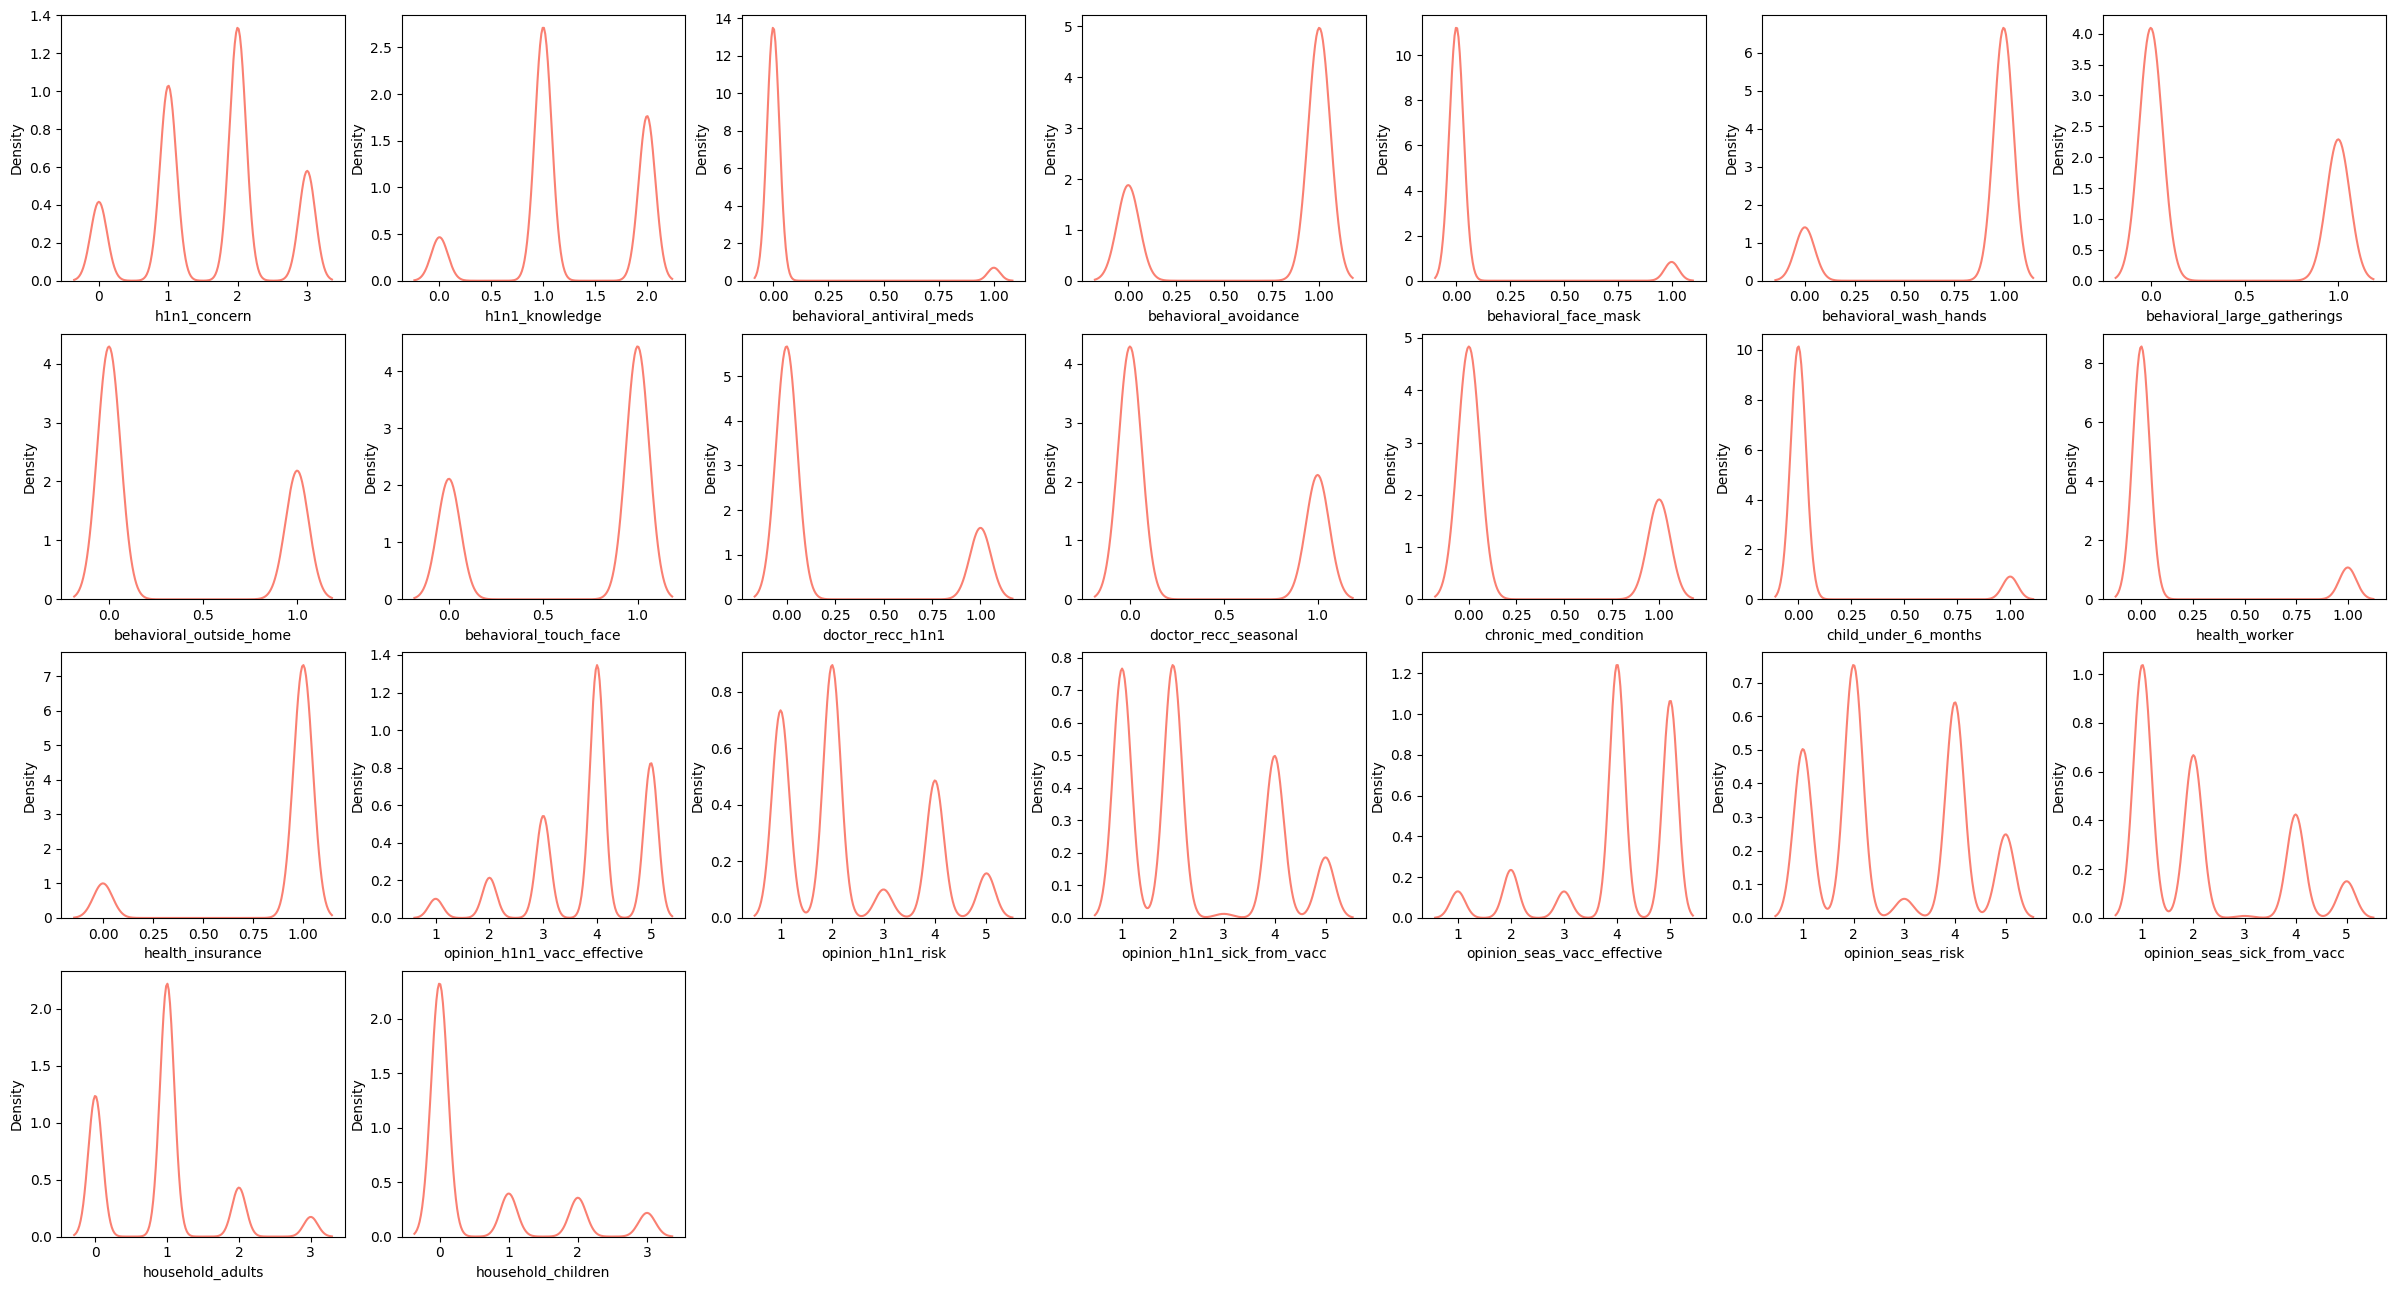

In [ ]:
#Melakukan Analisis Univariat Menggunakan Line Chart
#Dapat digunakan untuk memahami pola data dan identifikasi anomali data
features = nums
plt.figure(figsize=(30, 20))
for i in range(0, len(features)):
    plt.subplot(5, 7, i+1)
    sns.kdeplot(x=merged_df[features[i]], color='salmon')
    plt.xlabel(features[i])

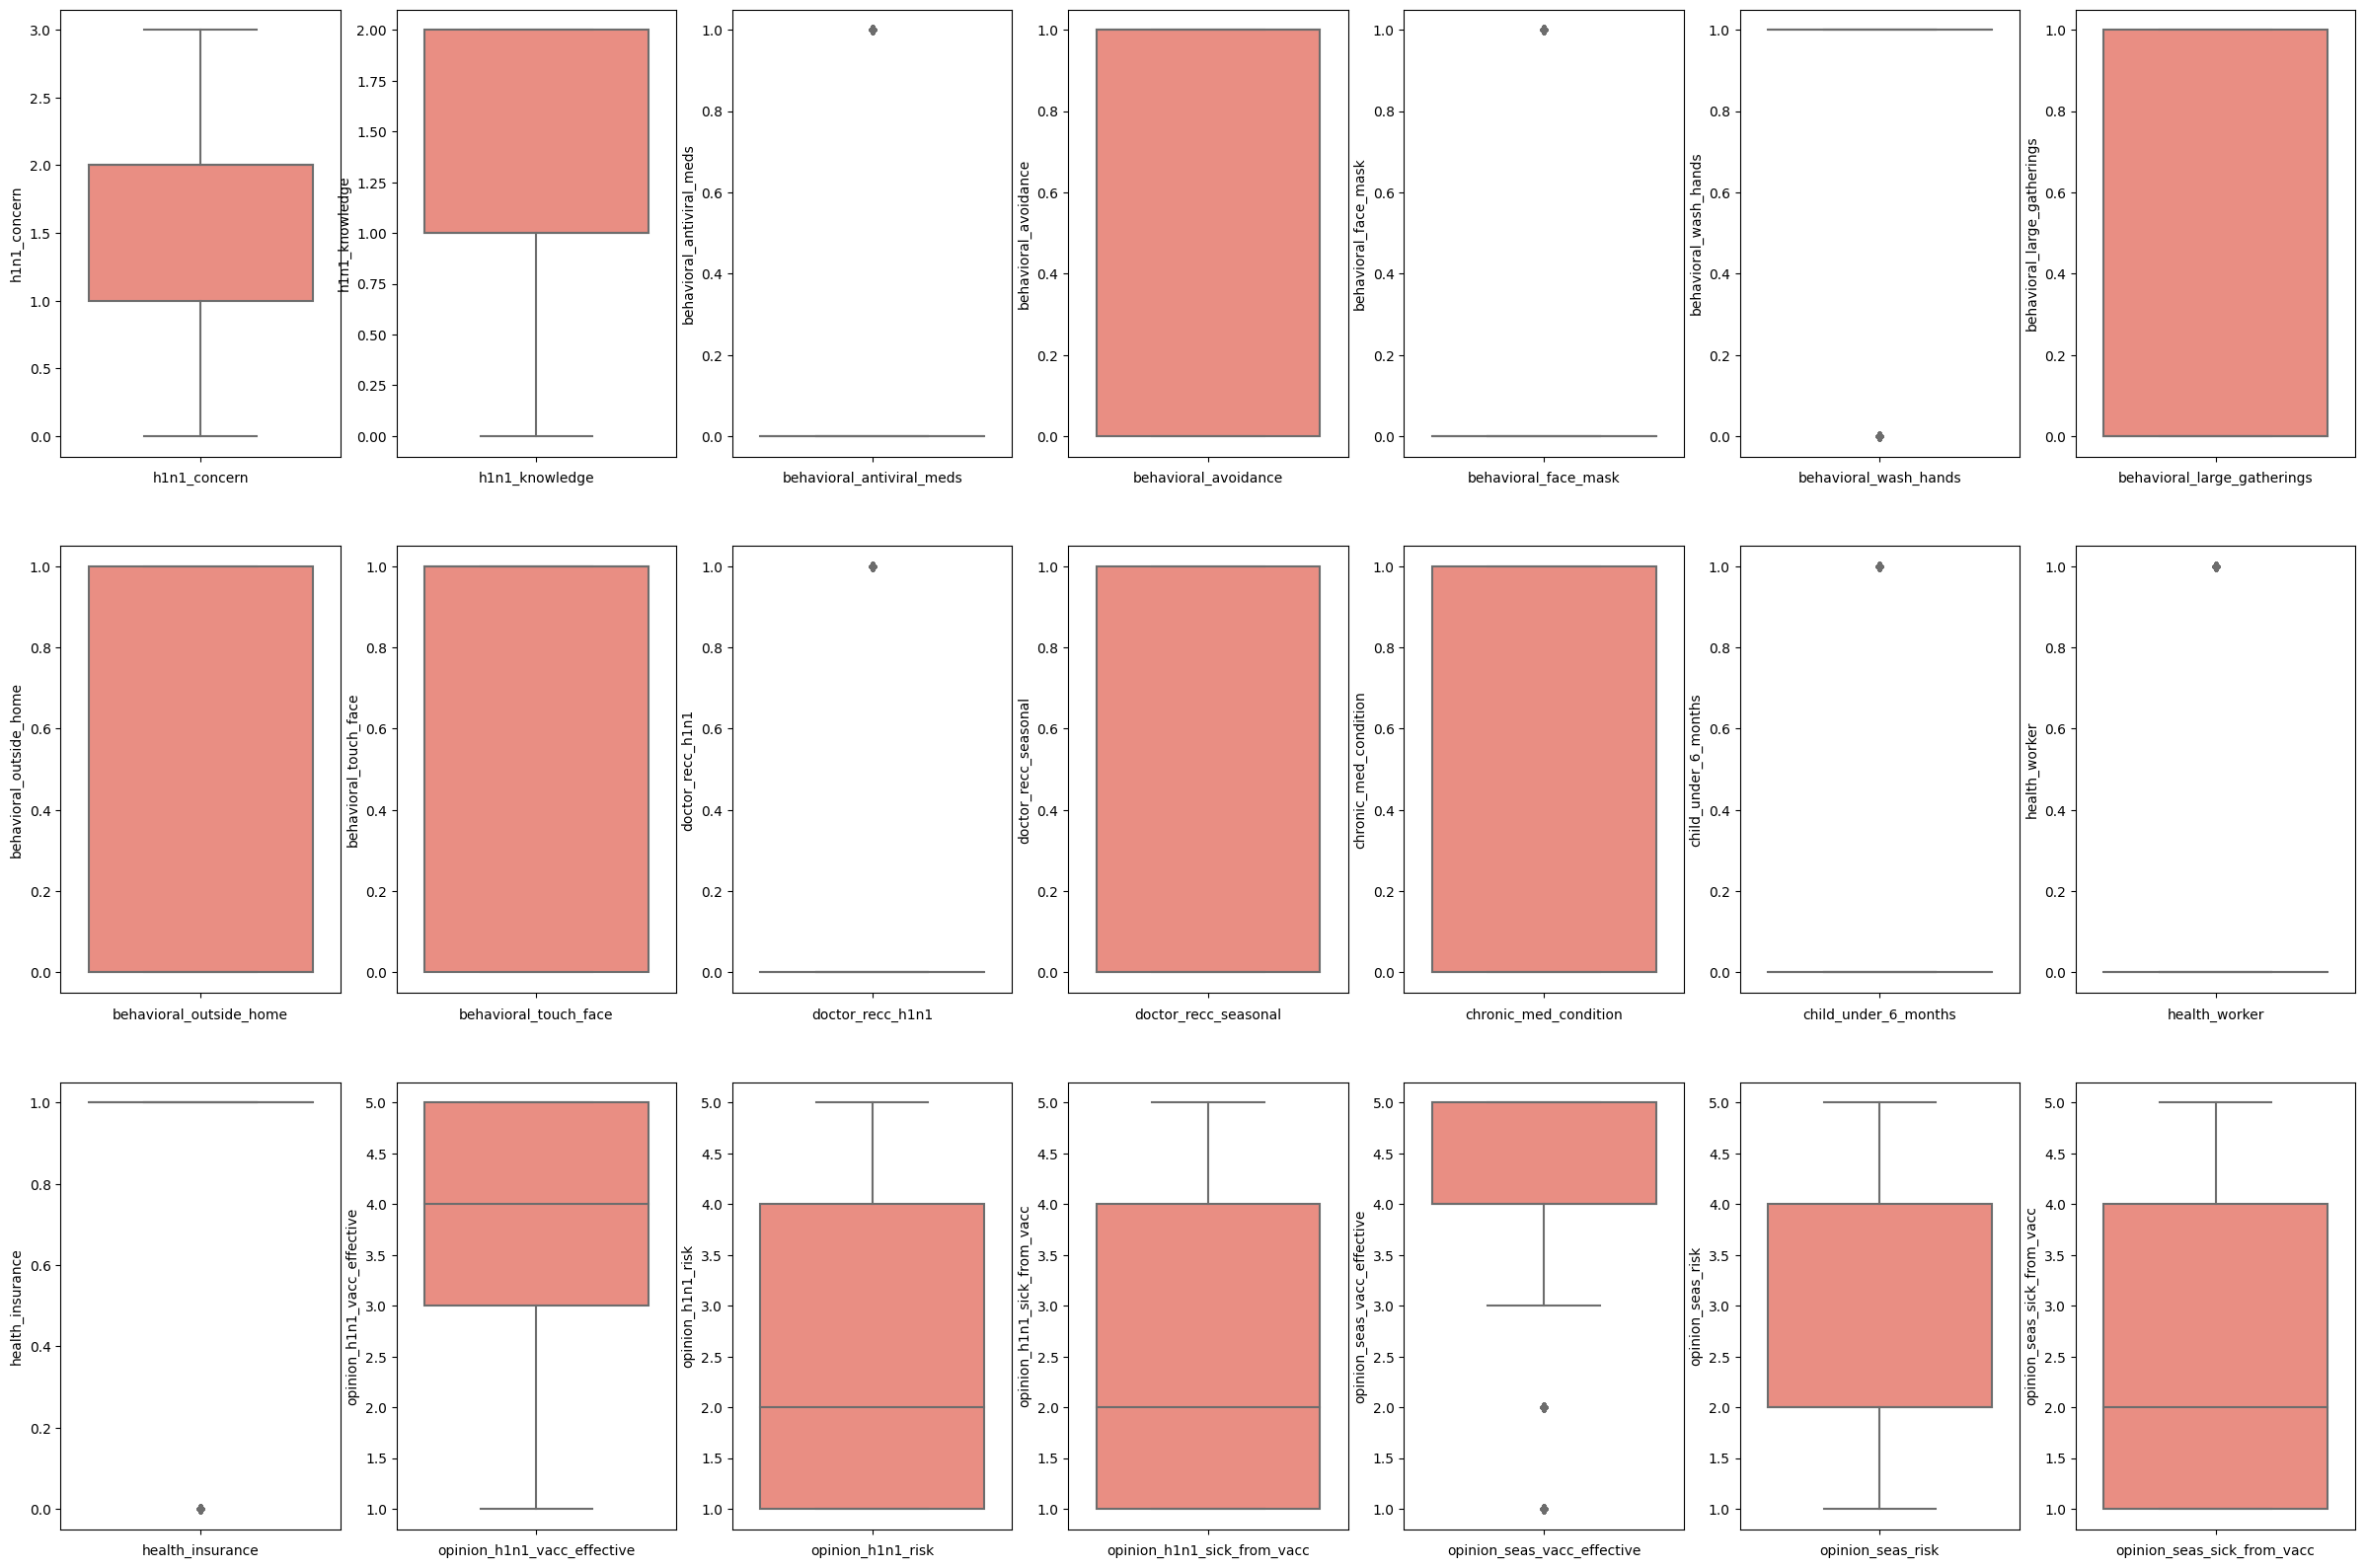

In [ ]:
#Melakukan Analisis Univariat Menggunakan Boxplot
#Dapat digunakan untuk mendeteksi adanya outlier
plt.figure(figsize=(30,20))
features = nums[:21]
for i in range(0, len(features)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=merged_df[features[i]], color='salmon', orient='v')
    plt.xlabel(features[i])

In [ ]:
#Analisis Multivariat
#Berguna untuk mengalisis korelasi antar variabel independen
df1.corr()

<ipython-input-23-fe4b7349bde4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,1.000000,0.017839,0.003425,-0.008475,0.009638,-0.006644,0.011105,0.004539,0.009011,0.007575,...,-0.003149,-0.012603,0.005912,0.000958,-0.002270,0.005935,-0.005291,0.009563,0.000187,-0.003726
h1n1_concern,0.017839,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,...,0.033562,-0.003655,0.239604,0.377033,0.360070,0.235136,0.333990,0.225731,-0.015658,0.050525
h1n1_knowledge,0.003425,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,...,0.170252,0.119408,0.121009,0.073086,-0.019501,0.086103,0.076825,-0.062483,0.024874,0.050583
behavioral_antiviral_meds,-0.008475,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,...,0.009465,-0.063988,0.030211,0.105163,0.079091,0.015003,0.085315,0.084305,0.044900,0.084822
behavioral_avoidance,0.009638,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,...,0.001180,0.032662,0.112300,0.117851,0.131405,0.119554,0.129504,0.082942,0.019122,0.040328
behavioral_face_mask,-0.006644,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,...,0.069992,-0.040257,0.037651,0.131165,0.107129,0.041556,0.110161,0.090009,0.013991,0.005826
behavioral_wash_hands,0.011105,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,...,0.053761,0.031919,0.136987,0.168711,0.150024,0.138517,0.172464,0.088029,0.009669,0.047764
behavioral_large_gatherings,0.004539,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,...,-0.032319,-0.059000,0.052299,0.126463,0.185924,0.078491,0.132865,0.135446,-0.031938,-0.009449
behavioral_outside_home,0.009011,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,...,-0.034619,-0.061381,0.050748,0.125549,0.174834,0.067469,0.120237,0.138133,-0.027527,-0.009558
behavioral_touch_face,0.007575,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,...,0.067648,0.011024,0.104126,0.146080,0.131772,0.105798,0.143735,0.090097,-0.000553,0.023606


<ipython-input-24-09979ae6d9e2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmaps=sns.heatmap(df1.corr(),cmap='gray', annot=True, fmt='.2f')


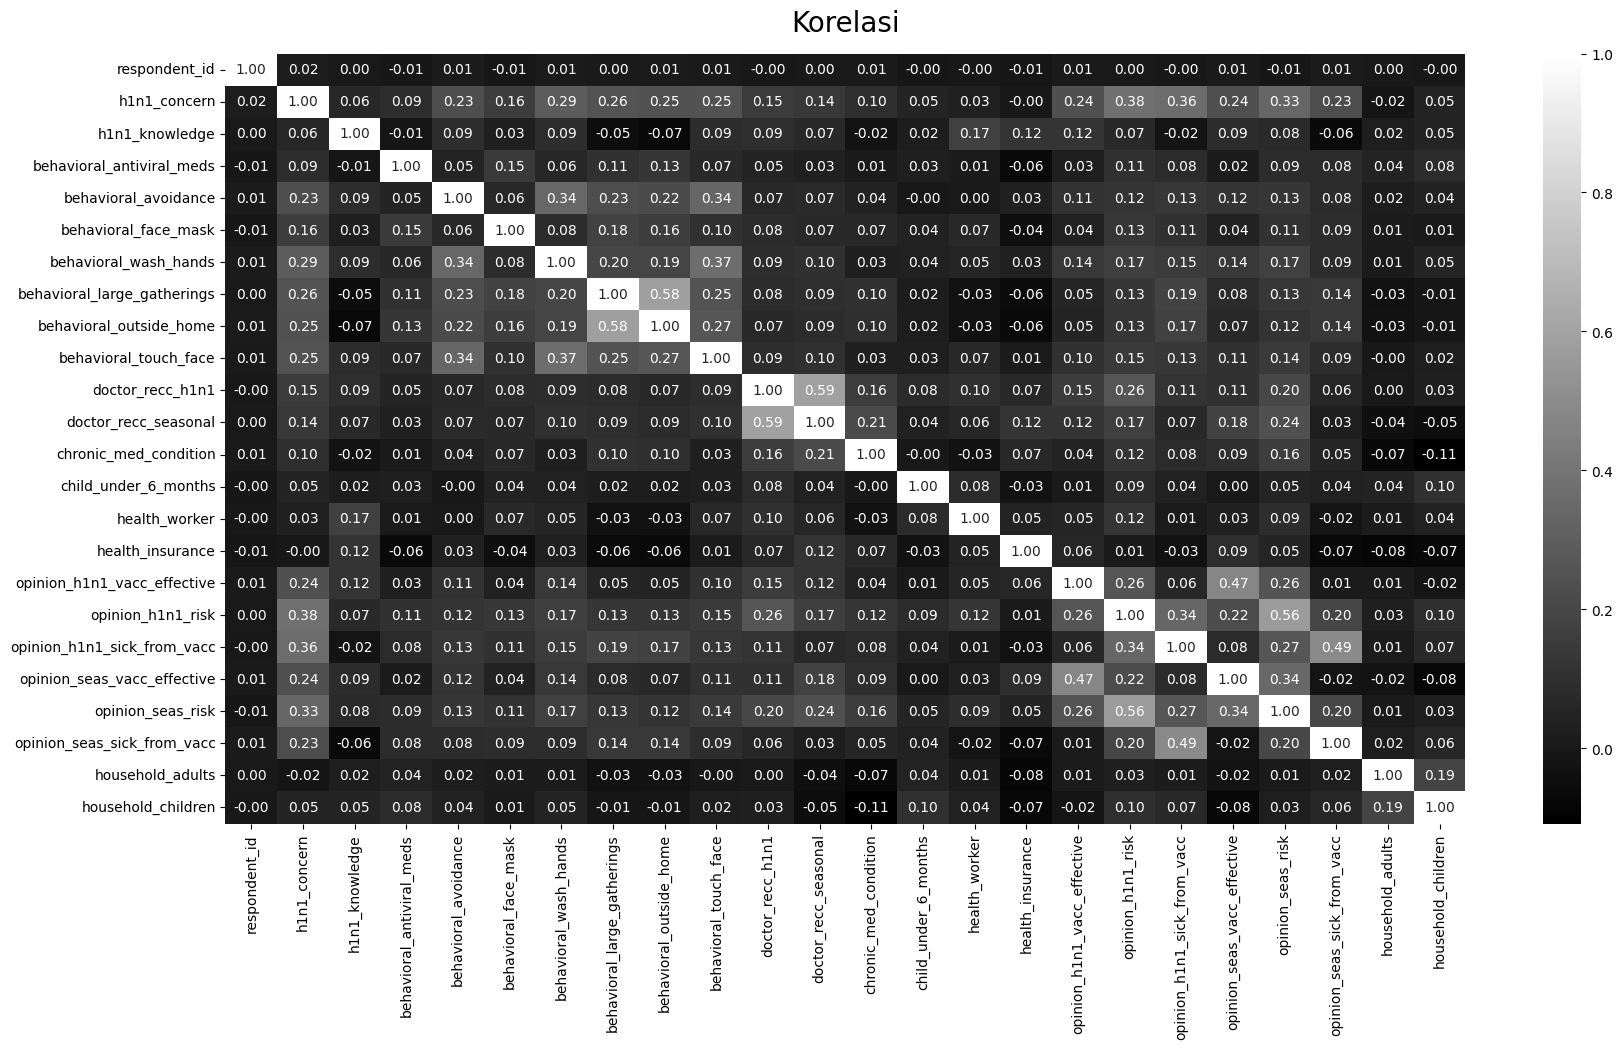

In [ ]:
#Membuat Matriks Korelasi Antar Kolom
plt.figure(figsize=(20,10))
heatmaps=sns.heatmap(df1.corr(),cmap='gray', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':20}, pad=16);

## **Pre-Processing**

In [ ]:
#Cek Data Duplikat
print("Data Duplikat =", merged_df.duplicated().sum())

Data Duplikat = 0


In [ ]:
#Cek Data Uniq
merged_df.nunique()

respondent_id                  26707
h1n1_concern                       4
h1n1_knowledge                     3
behavioral_antiviral_meds          2
behavioral_avoidance               2
behavioral_face_mask               2
behavioral_wash_hands              2
behavioral_large_gatherings        2
behavioral_outside_home            2
behavioral_touch_face              2
doctor_recc_h1n1                   2
doctor_recc_seasonal               2
chronic_med_condition              2
child_under_6_months               2
health_worker                      2
health_insurance                   2
opinion_h1n1_vacc_effective        5
opinion_h1n1_risk                  5
opinion_h1n1_sick_from_vacc        5
opinion_seas_vacc_effective        5
opinion_seas_risk                  5
opinion_seas_sick_from_vacc        5
age_group                          5
education                          4
race                               4
sex                                2
income_poverty                     3
m

In [ ]:
#Cek Jumlah Missing Value
merged_df.isna().sum().sort_values(ascending=False)

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_adults                 249
household_children               249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

In [ ]:
#Cek Persentasi Missing Value
(merged_df.isnull().sum()/len(merged_df)).to_frame('Presentase Hilang')

,Presentase Hilang
respondent_id,0.000000
h1n1_concern,0.003445
h1n1_knowledge,0.004343
behavioral_antiviral_meds,0.002658
behavioral_avoidance,0.007788
behavioral_face_mask,0.000711
behavioral_wash_hands,0.001573
behavioral_large_gatherings,0.003258
behavioral_outside_home,0.003070
behavioral_touch_face,0.004793


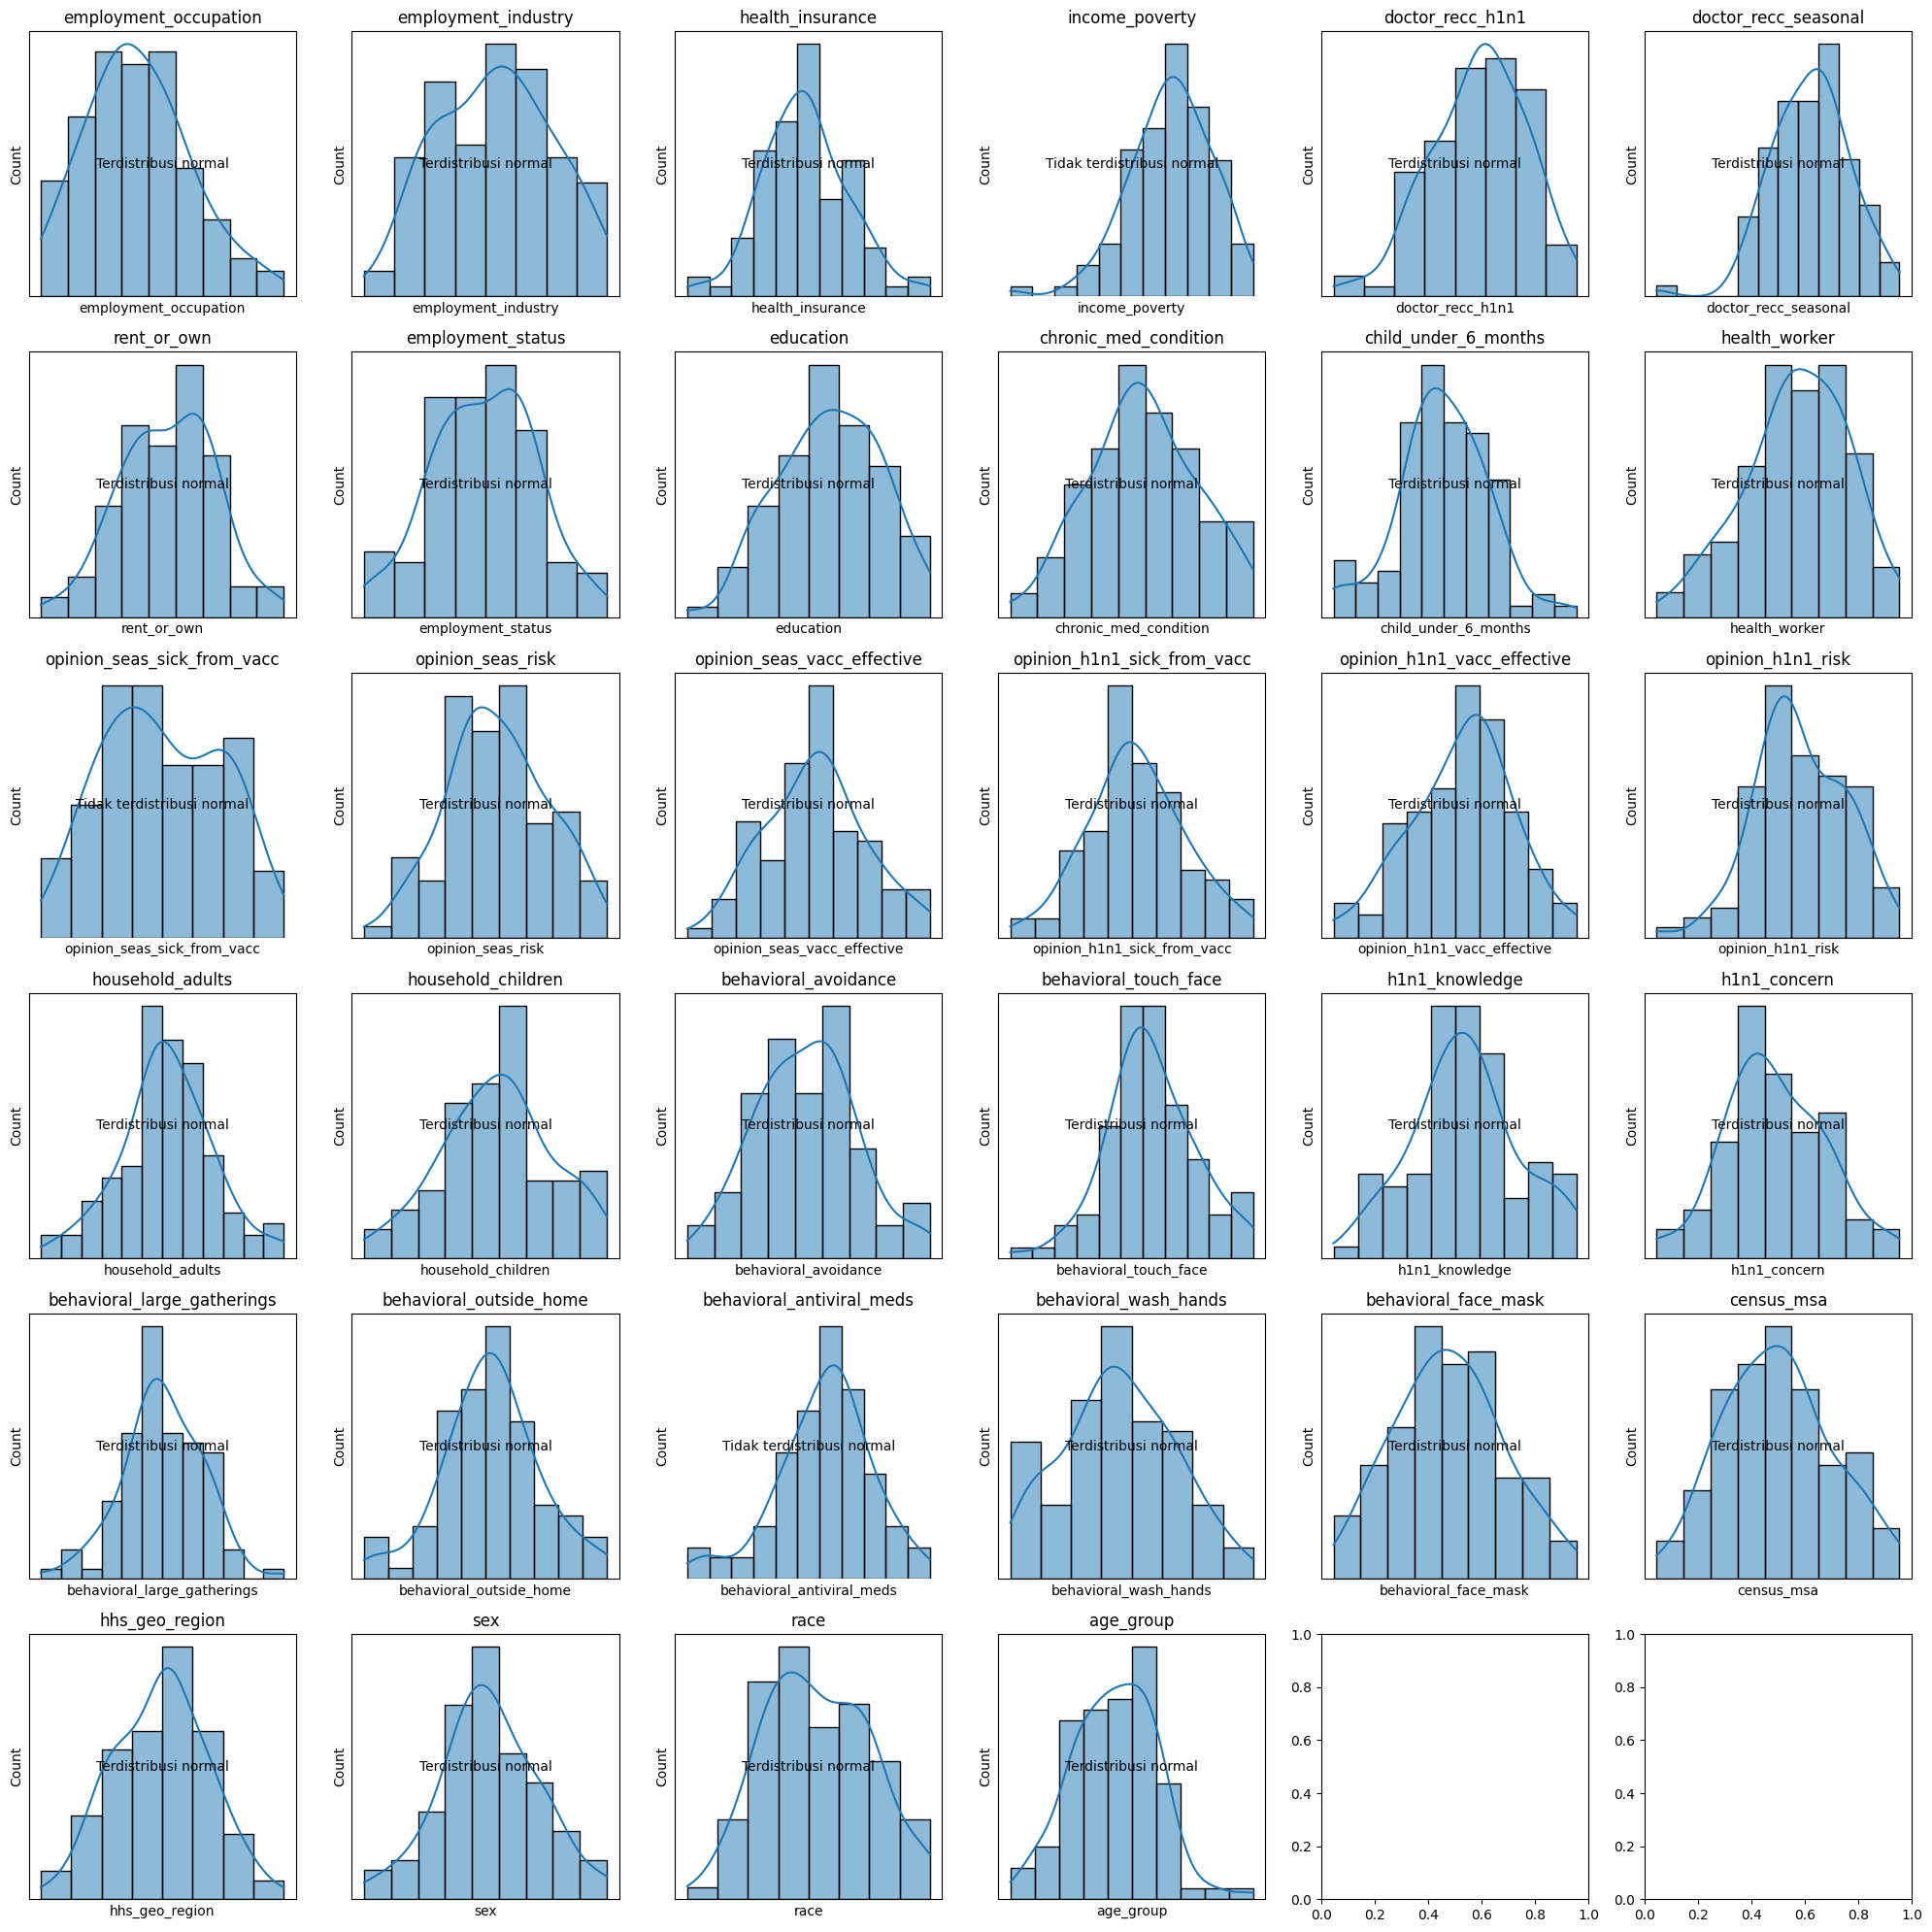

In [ ]:
#UJI NORMALITAS
# membuat dataframe
dataframe = pd.DataFrame(np.random.normal(size=(100, 34)), columns=['employment_occupation', 'employment_industry', 'health_insurance', 
                                                                    'income_poverty', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
                                                                    'rent_or_own', 'employment_status', 'education', 'chronic_med_condition', 
                                                                    'child_under_6_months', 'health_worker', 'opinion_seas_sick_from_vacc', 'opinion_seas_risk',
                                                                    'opinion_seas_vacc_effective', 'opinion_h1n1_sick_from_vacc', 'opinion_h1n1_vacc_effective', 
                                                                    'opinion_h1n1_risk', 'household_adults', 'household_children',
                                                                    'behavioral_avoidance', 'behavioral_touch_face', 'h1n1_knowledge', 'h1n1_concern', 
                                                                    'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_antiviral_meds',
                                                                    'behavioral_wash_hands', 'behavioral_face_mask', 'census_msa','hhs_geo_region','sex', 'race', 'age_group'])

# membuat subplot dengan sns.displot()
fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))
axs = axs.flatten()  # Meratakan array subplot

# Melakukan loop untuk menggambar histogram setiap variabel
for i, col in enumerate(dataframe.columns):
    sns.histplot(dataframe[col], kde=True, ax=axs[i])
    axs[i].set_title(col)  # Menambahkan judul untuk setiap subplot

    # Melakukan uji normalitas dengan Shapiro-Wilk Test
    stat, p = shapiro(dataframe[col])
    alpha = 0.05
    if p > alpha:
        axs[i].text(0.5, 0.5, 'Terdistribusi normal', ha='center', va='center', transform=axs[i].transAxes)
    else:
        axs[i].text(0.5, 0.5, 'Tidak terdistribusi normal', ha='center', va='center', transform=axs[i].transAxes)
        axs[i].spines['top'].set_visible(False)  # Menghilangkan garis atas pada subplot
        axs[i].spines['right'].set_visible(False)  # Menghilangkan garis kanan pada subplot
        axs[i].spines['bottom'].set_visible(False)  # Menghilangkan garis bawah pada subplot
        axs[i].spines['left'].set_visible(False)  # Menghilangkan garis kiri pada subplot

    axs[i].set_xticks([])  # Menghilangkan sumbu x pada setiap subplot
    axs[i].set_yticks([])  # Menghilangkan sumbu y pada setiap subplot

plt.tight_layout()  # Menyesuaikan tata letak subplot


In [ ]:
#Karena variabel rata-rata berdistribusi normal, maka untuk mengatasi missing value menggunakan mean
# mengisi missing value pada kolom dengan mean
mean = merged_df["health_insurance"].mean() #Menghitung rata-rata kolom
merged_df["health_insurance"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["doctor_recc_h1n1"].mean() #Menghitung rata-rata kolom
merged_df["doctor_recc_h1n1"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["doctor_recc_seasonal"].mean() #Menghitung rata-rata kolom
merged_df["doctor_recc_seasonal"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["chronic_med_condition"].mean() #Menghitung rata-rata kolom
merged_df["chronic_med_condition"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["child_under_6_months"].mean() #Menghitung rata-rata kolom
merged_df["child_under_6_months"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["health_worker"].mean() #Menghitung rata-rata kolom
merged_df["health_worker"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["opinion_h1n1_vacc_effective"].mean() #Menghitung rata-rata kolom
merged_df["opinion_h1n1_vacc_effective"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["opinion_seas_sick_from_vacc"].mean() #Menghitung rata-rata kolom
merged_df["opinion_seas_sick_from_vacc"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["opinion_seas_risk"].mean() #Menghitung rata-rata kolom
merged_df["opinion_seas_risk"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["opinion_seas_vacc_effective"].mean() #Menghitung rata-rata kolom
merged_df["opinion_seas_vacc_effective"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["opinion_h1n1_risk"].mean() #Menghitung rata-rata kolom
merged_df["opinion_h1n1_risk"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["household_adults"].mean() #Menghitung rata-rata kolom
merged_df["household_adults"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["opinion_h1n1_sick_from_vacc"].mean() #Menghitung rata-rata kolom
merged_df["opinion_h1n1_sick_from_vacc"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["household_children"].mean() #Menghitung rata-rata kolom
merged_df["household_children"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["behavioral_avoidance"].mean() #Menghitung rata-rata kolom
merged_df["behavioral_avoidance"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["behavioral_touch_face"].mean() #Menghitung rata-rata kolom
merged_df["behavioral_touch_face"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["h1n1_knowledge"].mean() #Menghitung rata-rata kolom
merged_df["h1n1_knowledge"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["h1n1_concern"].mean() #Menghitung rata-rata kolom
merged_df["h1n1_concern"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["behavioral_large_gatherings"].mean() #Menghitung rata-rata kolom
merged_df["behavioral_large_gatherings"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["behavioral_outside_home"].mean() #Menghitung rata-rata kolom
merged_df["behavioral_outside_home"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["behavioral_antiviral_meds"].mean() #Menghitung rata-rata kolom
merged_df["behavioral_antiviral_meds"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["behavioral_wash_hands"].mean() #Menghitung rata-rata kolom
merged_df["behavioral_wash_hands"].fillna(mean, inplace=True) #Mengambil nilai mean
mean = merged_df["behavioral_face_mask"].mean() #Menghitung rata-rata kolom
merged_df["behavioral_face_mask"].fillna(mean, inplace=True) #Mengambil nilai mean

In [ ]:
#Pengecekan Missing Value Kembali
merged_df.isna().sum()

respondent_id                      0
h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [ ]:
#Mengatasi Missing Value Data Tipe Object
#Untuk mengatasi missing value pada kolom yang berisi data object, tidak dapat menggunakan metode mean 
#Alasannya karena mean hanya dapat dihitung pada data numerik. 
# Sehingga, mengatasi missing value pada tipe data object untuk kasus ini dapat menggunakan modus
mode = merged_df['age_group'].mode()[0] # mengambil nilai modus
merged_df['age_group'] = merged_df['age_group'].fillna(mode)
ode = merged_df['education'].mode()[0] # mengambil nilai modus
merged_df['education'] = merged_df['education'].fillna(mode)
ode = merged_df['income_poverty'].mode()[0] # mengambil nilai modus
merged_df['income_poverty'] = merged_df['income_poverty'].fillna(mode)
ode = merged_df['marital_status'].mode()[0] # mengambil nilai modus
merged_df['marital_status'] = merged_df['marital_status'].fillna(mode)
ode = merged_df['rent_or_own'].mode()[0] # mengambil nilai modus
merged_df['rent_or_own'] = merged_df['rent_or_own'].fillna(mode)
ode = merged_df['employment_status'].mode()[0] # mengambil nilai modus
merged_df['employment_status'] = merged_df['employment_status'].fillna(mode)
ode = merged_df['employment_industry'].mode()[0] # mengambil nilai modus
merged_df['employment_industry'] = merged_df['employment_industry'].fillna(mode)
ode = merged_df['employment_occupation'].mode()[0] # mengambil nilai modus
merged_df['employment_occupation'] = merged_df['employment_occupation'].fillna(mode)

In [ ]:
#Pengecekan Missing Value Kembali
merged_df.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [ ]:
#Mengubah Data Object ke Numerik
from sklearn.preprocessing import LabelEncoder

columns = ['age_group', 'education', 'sex', 'income_poverty', 'marital_status',
           'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation', 'race' ]

le = LabelEncoder()
for col in columns:
    merged_df[col]=le.fit_transform(merged_df[col])


In [ ]:
#Labelling Data Target
merged_df['h1n1_vaccine'].replace('No', 0, inplace = True)
merged_df['h1n1_vaccine'].replace('Yes', 1, inplace = True)
merged_df['seasonal_vaccine'].replace('No', 0, inplace = True)
merged_df['seasonal_vaccine'].replace('Yes', 1, inplace = True)

In [ ]:
merged_df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,...,2,8,2,0.0,0.0,0,0,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,...,1,1,0,0.0,0.0,13,20,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,1,9,0,2.0,0.0,15,22,2,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,...,2,5,1,0.0,0.0,0,0,3,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,...,1,9,0,1.0,0.0,19,6,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,...,2,9,2,0.0,0.0,0,0,26702,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,...,1,6,1,1.0,0.0,5,3,26703,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,...,0,6,0,0.0,0.0,0,0,26704,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.677264,...,1,5,2,1.0,0.0,5,7,26705,0,0


In [ ]:
#Standardisasi Data
#Merupakan proses mengubah nilai-nilai data menjadi skala yang sama 
#Tujuannya agar data dapat dibandingkan dan digunakan dalam analisis dengan cara yang konsisten
from sklearn.preprocessing import StandardScaler
merged_df['h1n1_concern'] = StandardScaler().fit_transform(merged_df['h1n1_concern'].values.reshape(len(merged_df), 1))
merged_df['h1n1_knowledge'] = StandardScaler().fit_transform(merged_df['h1n1_knowledge'].values.reshape(len(merged_df), 1))
merged_df['behavioral_antiviral_meds'] = StandardScaler().fit_transform(merged_df['behavioral_antiviral_meds'].values.reshape(len(merged_df), 1))
merged_df['behavioral_avoidance'] = StandardScaler().fit_transform(merged_df['behavioral_avoidance'].values.reshape(len(merged_df), 1))
merged_df['behavioral_face_mask'] = StandardScaler().fit_transform(merged_df['behavioral_face_mask'].values.reshape(len(merged_df), 1))
merged_df['behavioral_wash_hands'] = StandardScaler().fit_transform(merged_df['behavioral_wash_hands'].values.reshape(len(merged_df), 1))
merged_df['behavioral_large_gatherings'] = StandardScaler().fit_transform(merged_df['behavioral_large_gatherings'].values.reshape(len(merged_df), 1))
merged_df['behavioral_outside_home'] = StandardScaler().fit_transform(merged_df['behavioral_outside_home'].values.reshape(len(merged_df), 1))
merged_df['behavioral_touch_face'] = StandardScaler().fit_transform(merged_df['behavioral_touch_face'].values.reshape(len(merged_df), 1))
merged_df['doctor_recc_h1n1'] = StandardScaler().fit_transform(merged_df['doctor_recc_h1n1'].values.reshape(len(merged_df), 1))
merged_df['doctor_recc_seasonal'] = StandardScaler().fit_transform(merged_df['doctor_recc_seasonal'].values.reshape(len(merged_df), 1))
merged_df['chronic_med_condition'] = StandardScaler().fit_transform(merged_df['chronic_med_condition'].values.reshape(len(merged_df), 1))
merged_df['child_under_6_months'] = StandardScaler().fit_transform(merged_df['child_under_6_months'].values.reshape(len(merged_df), 1))
merged_df['health_worker'] = StandardScaler().fit_transform(merged_df['health_worker'].values.reshape(len(merged_df), 1))
merged_df['health_insurance'] = StandardScaler().fit_transform(merged_df['health_insurance'].values.reshape(len(merged_df), 1))
merged_df['opinion_h1n1_vacc_effective'] = StandardScaler().fit_transform(merged_df['opinion_h1n1_vacc_effective'].values.reshape(len(merged_df), 1))
merged_df['opinion_h1n1_risk'] = StandardScaler().fit_transform(merged_df['opinion_h1n1_risk'].values.reshape(len(merged_df), 1))
merged_df['opinion_h1n1_sick_from_vacc'] = StandardScaler().fit_transform(merged_df['opinion_h1n1_sick_from_vacc'].values.reshape(len(merged_df), 1))
merged_df['opinion_seas_vacc_effective'] = StandardScaler().fit_transform(merged_df['opinion_seas_vacc_effective'].values.reshape(len(merged_df), 1))
merged_df['opinion_seas_risk'] = StandardScaler().fit_transform(merged_df['opinion_seas_risk'].values.reshape(len(merged_df), 1))
merged_df['opinion_seas_sick_from_vacc'] = StandardScaler().fit_transform(merged_df['opinion_seas_sick_from_vacc'].values.reshape(len(merged_df), 1))
merged_df['household_adults'] = StandardScaler().fit_transform(merged_df['household_adults'].values.reshape(len(merged_df), 1))
merged_df['household_children'] = StandardScaler().fit_transform(merged_df['household_children'].values.reshape(len(merged_df), 1))
merged_df['rent_or_own'] = StandardScaler().fit_transform(merged_df['rent_or_own'].values.reshape(len(merged_df), 1))
merged_df['employment_status'] = StandardScaler().fit_transform(merged_df['employment_status'].values.reshape(len(merged_df), 1))
merged_df['hhs_geo_region'] = StandardScaler().fit_transform(merged_df['hhs_geo_region'].values.reshape(len(merged_df), 1))
merged_df['census_msa'] = StandardScaler().fit_transform(merged_df['census_msa'].values.reshape(len(merged_df), 1))
merged_df['employment_industry'] = StandardScaler().fit_transform(merged_df['employment_industry'].values.reshape(len(merged_df), 1))
merged_df['employment_occupation'] = StandardScaler().fit_transform(merged_df['employment_occupation'].values.reshape(len(merged_df), 1))
merged_df['age_group'] = StandardScaler().fit_transform(merged_df['age_group'].values.reshape(len(merged_df), 1))
merged_df['education'] = StandardScaler().fit_transform(merged_df['education'].values.reshape(len(merged_df), 1))
merged_df['race'] = StandardScaler().fit_transform(merged_df['race'].values.reshape(len(merged_df), 1))
merged_df['sex'] = StandardScaler().fit_transform(merged_df['sex'].values.reshape(len(merged_df), 1))
merged_df['income_poverty'] = StandardScaler().fit_transform(merged_df['income_poverty'].values.reshape(len(merged_df), 1))
merged_df['marital_status'] = StandardScaler().fit_transform(merged_df['marital_status'].values.reshape(len(merged_df), 1))


In [ ]:
#Menghilangkan Variabel yang tidak dibutuhkan dalam model prediction
to_drop = ['respondent_id']
merged_df.drop(to_drop, inplace = True, axis = 1)
merged_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,-0.680609,-2.046928,-0.226911,-1.632555,-0.272298,-2.177583,-0.749009,1.403796,0.691971,-0.554462,...,-0.276396,0.825976,1.129841,1.416875,-1.182177,-0.578667,-0.747308,-0.784504,0,0
1,1.520279,1.195647,-0.226911,0.617345,-0.272298,0.459948,-0.749009,1.403796,0.691971,-0.554462,...,1.622678,-0.641418,-1.364875,-1.012379,-1.182177,-0.578667,1.088930,1.728977,0,1
2,-0.680609,-0.425641,-0.226911,0.617345,-0.272298,-2.177583,-0.749009,-0.714548,-1.452107,0.000000,...,-0.276396,-0.641418,1.486229,-1.012379,1.484891,-0.578667,1.371428,1.980325,0,0
3,-0.680609,-0.425641,-0.226911,0.617345,-0.272298,0.459948,1.339461,-0.714548,-1.452107,-0.554462,...,1.622678,0.825976,0.060677,0.202248,-1.182177,-0.578667,-0.747308,-0.784504,0,1
4,0.419835,-0.425641,-0.226911,0.617345,-0.272298,0.459948,1.339461,-0.714548,0.691971,-0.554462,...,-0.276396,-0.641418,1.486229,-1.012379,0.151357,-0.578667,1.936425,-0.030460,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.419835,-2.046928,-0.226911,0.617345,-0.272298,-2.177583,-0.749009,1.403796,-1.452107,-0.554462,...,-0.276396,0.825976,1.486229,1.416875,-1.182177,-0.578667,-0.747308,-0.784504,0,0
26703,-0.680609,1.195647,-0.226911,0.617345,-0.272298,0.459948,-0.749009,-0.714548,-1.452107,1.962251,...,1.622678,-0.641418,0.417065,0.202248,0.151357,-0.578667,-0.041063,-0.407482,0,0
26704,0.419835,1.195647,-0.226911,0.617345,3.675062,0.459948,1.339461,-0.714548,0.691971,-0.554462,...,-0.276396,-2.108813,0.417065,-1.012379,-1.182177,-0.578667,-0.747308,-0.784504,0,1
26705,-0.680609,-0.425641,-0.226911,-1.632555,-0.272298,-2.177583,-0.749009,-0.714548,0.000000,-0.554462,...,1.622678,-0.641418,0.060677,1.416875,0.151357,-0.578667,-0.041063,0.095214,0,0


## **Memisahkan Feature dan Target serta Mengatasi Data Target Inbalanced**

In [ ]:
#Memisahkan Feature dan Target
X = merged_df.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis = 1)
Y = merged_df[['h1n1_vaccine', 'seasonal_vaccine']]

In [ ]:
X

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,-0.680609,-2.046928,-0.226911,-1.632555,-0.272298,-2.177583,-0.749009,1.403796,0.691971,-0.554462,...,1.986729,1.047150,-0.276396,0.825976,1.129841,1.416875,-1.182177,-0.578667,-0.747308,-0.784504
1,1.520279,1.195647,-0.226911,0.617345,-0.272298,0.459948,-0.749009,1.403796,0.691971,-0.554462,...,1.986729,1.047150,1.622678,-0.641418,-1.364875,-1.012379,-1.182177,-0.578667,1.088930,1.728977
2,-0.680609,-0.425641,-0.226911,0.617345,-0.272298,-2.177583,-0.749009,-0.714548,-1.452107,0.000000,...,-0.338762,1.047150,-0.276396,-0.641418,1.486229,-1.012379,1.484891,-0.578667,1.371428,1.980325
3,-0.680609,-0.425641,-0.226911,0.617345,-0.272298,0.459948,1.339461,-0.714548,-1.452107,-0.554462,...,1.986729,1.047150,1.622678,0.825976,0.060677,0.202248,-1.182177,-0.578667,-0.747308,-0.784504
4,0.419835,-0.425641,-0.226911,0.617345,-0.272298,0.459948,1.339461,-0.714548,0.691971,-0.554462,...,-0.338762,-0.661129,-0.276396,-0.641418,1.486229,-1.012379,0.151357,-0.578667,1.936425,-0.030460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.419835,-2.046928,-0.226911,0.617345,-0.272298,-2.177583,-0.749009,1.403796,-1.452107,-0.554462,...,-0.338762,1.047150,-0.276396,0.825976,1.486229,1.416875,-1.182177,-0.578667,-0.747308,-0.784504
26703,-0.680609,1.195647,-0.226911,0.617345,-0.272298,0.459948,-0.749009,-0.714548,-1.452107,1.962251,...,-0.338762,1.047150,1.622678,-0.641418,0.417065,0.202248,0.151357,-0.578667,-0.041063,-0.407482
26704,0.419835,1.195647,-0.226911,0.617345,3.675062,0.459948,1.339461,-0.714548,0.691971,-0.554462,...,-1.501508,1.047150,-0.276396,-2.108813,0.417065,-1.012379,-1.182177,-0.578667,-0.747308,-0.784504
26705,-0.680609,-0.425641,-0.226911,-1.632555,-0.272298,-2.177583,-0.749009,-0.714548,0.000000,-0.554462,...,-0.338762,-0.661129,1.622678,-0.641418,0.060677,1.416875,0.151357,-0.578667,-0.041063,0.095214


In [ ]:
Y

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1
26705,0,0


In [ ]:
# Pisahkan output yang ingin Anda seimbangkan (h1n1_vaccine) dari data multioutput
Y1 = Y['h1n1_vaccine']

# Terapkan SMOTE pada Y1
smote = SMOTE(random_state=42)
Y1_balanced, _ = smote.fit_resample(pd.DataFrame(Y1), Y1)


# Menggabungkan kembali Y1_balanced dengan output seasonal_vaccine dan data lainnya
balanced_data = pd.concat([pd.DataFrame(Y1_balanced, columns=['h1n1_vaccine']).reset_index(drop=True), Y['seasonal_vaccine'].reset_index(drop=True), X.reset_index(drop=True)], axis=1)

# Menangani nilai NaN
balanced_data = balanced_data.dropna()

# Cek apakah masih terdapat nilai NaN dalam balanced_data
print(balanced_data.isnull().sum())

# Lanjutkan dengan pemodelan menggunakan balanced_data



h1n1_vaccine                   0
seasonal_vaccine               0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment

In [ ]:
balanced_data

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0.0,-0.680609,-2.046928,-0.226911,-1.632555,-0.272298,-2.177583,-0.749009,1.403796,...,1.986729,1.047150,-0.276396,0.825976,1.129841,1.416875,-1.182177,-0.578667,-0.747308,-0.784504
1,0,1.0,1.520279,1.195647,-0.226911,0.617345,-0.272298,0.459948,-0.749009,1.403796,...,1.986729,1.047150,1.622678,-0.641418,-1.364875,-1.012379,-1.182177,-0.578667,1.088930,1.728977
2,0,0.0,-0.680609,-0.425641,-0.226911,0.617345,-0.272298,-2.177583,-0.749009,-0.714548,...,-0.338762,1.047150,-0.276396,-0.641418,1.486229,-1.012379,1.484891,-0.578667,1.371428,1.980325
3,0,1.0,-0.680609,-0.425641,-0.226911,0.617345,-0.272298,0.459948,1.339461,-0.714548,...,1.986729,1.047150,1.622678,0.825976,0.060677,0.202248,-1.182177,-0.578667,-0.747308,-0.784504
4,0,0.0,0.419835,-0.425641,-0.226911,0.617345,-0.272298,0.459948,1.339461,-0.714548,...,-0.338762,-0.661129,-0.276396,-0.641418,1.486229,-1.012379,0.151357,-0.578667,1.936425,-0.030460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0,0.0,0.419835,-2.046928,-0.226911,0.617345,-0.272298,-2.177583,-0.749009,1.403796,...,-0.338762,1.047150,-0.276396,0.825976,1.486229,1.416875,-1.182177,-0.578667,-0.747308,-0.784504
26703,0,0.0,-0.680609,1.195647,-0.226911,0.617345,-0.272298,0.459948,-0.749009,-0.714548,...,-0.338762,1.047150,1.622678,-0.641418,0.417065,0.202248,0.151357,-0.578667,-0.041063,-0.407482
26704,0,1.0,0.419835,1.195647,-0.226911,0.617345,3.675062,0.459948,1.339461,-0.714548,...,-1.501508,1.047150,-0.276396,-2.108813,0.417065,-1.012379,-1.182177,-0.578667,-0.747308,-0.784504
26705,0,0.0,-0.680609,-0.425641,-0.226911,-1.632555,-0.272298,-2.177583,-0.749009,-0.714548,...,-0.338762,-0.661129,1.622678,-0.641418,0.060677,1.416875,0.151357,-0.578667,-0.041063,0.095214


In [ ]:
#Memisahkan fitur (X) dan target (Y) dari balanced_data
X = balanced_data.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
Y = balanced_data[['h1n1_vaccine', 'seasonal_vaccine']]

In [ ]:
Y

,h1n1_vaccine,seasonal_vaccine
0,0,0.0
1,0,1.0
2,0,0.0
3,0,1.0
4,0,0.0
...,...,...
26702,0,0.0
26703,0,0.0
26704,0,1.0
26705,0,0.0


In [ ]:
#Mengecek kembali tipe data target
print(Y.dtypes)

h1n1_vaccine          int64
seasonal_vaccine    float64
dtype: object


In [ ]:
Y['h1n1_vaccine'] = Y['h1n1_vaccine'].astype('int')
Y['seasonal_vaccine'] = Y['seasonal_vaccine'].astype('int')

<ipython-input-47-74d30e3096bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['h1n1_vaccine'] = Y['h1n1_vaccine'].astype('int')
<ipython-input-47-74d30e3096bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['seasonal_vaccine'] = Y['seasonal_vaccine'].astype('int')


In [ ]:
#Mengecek kembali tipe data target
print(Y.dtypes)

h1n1_vaccine        int64
seasonal_vaccine    int64
dtype: object


In [ ]:
#Mengecek kembali apakah data target sudah binary
print(np.unique(Y))

[0 1]


## **Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
print("Y_test shape:", Y_test.shape)
print("Y_pred shape:", Y_pred.shape)


Y_test shape: (8013, 2)
Y_pred shape: (8013, 2)


## **Modelling**

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
logreg = LogisticRegression()
multi_classif = MultiOutputClassifier(logreg)
multi_classif.fit(X_train, Y_train)

MultiOutputClassifier(estimator=LogisticRegression())

In [ ]:
Y_pred = multi_classif.predict(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC score for each target variable
auc_scores = []
for i in range(Y_test.shape[1]):
    auc_scores.append(roc_auc_score(Y_test[:, i], Y_pred[:, i]))

# Calculate the mean of the ROC AUC scores
mean_auc = np.mean(auc_scores)

print("Mean ROC AUC:", mean_auc)


Mean ROC AUC: 0.7323119967267241


 **MODEL 2**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Initialize a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

In [ ]:
# Initialize a multi-output classifier with the decision tree classifier as the base estimator
multi_classif = MultiOutputClassifier(dtc)

In [ ]:
# Fit the multi-output classifier to the training data
multi_classif.fit(X_train, Y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=42))

In [ ]:
# Predict the target labels for the test set
Y_pred = multi_classif.predict(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC score for each target variable
auc_scores = []
for i in range(Y_test.shape[1]):
    auc_scores.append(roc_auc_score(Y_test[:, i], Y_pred[:, i]))

# Calculate the mean of the ROC AUC scores
mean_auc = np.mean(auc_scores)

print("Mean ROC AUC:", mean_auc)


Mean ROC AUC: 0.6794087035720413


**MODEL 3**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

In [ ]:
# Initialize a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Initialize a multi-output classifier with the random forest classifier as the base estimator
multi_classif = MultiOutputClassifier(rfc)

In [ ]:
# Fit the multi-output classifier to the training data
multi_classif.fit(X_train, Y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [ ]:
# Predict the target labels for the test set
Y_pred = multi_classif.predict(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC score for each target variable
auc_scores = []
for i in range(Y_test.shape[1]):
    auc_scores.append(roc_auc_score(Y_test[:, i], Y_pred[:, i]))

# Calculate the mean of the ROC AUC scores
mean_auc = np.mean(auc_scores)

print("Mean ROC AUC:", mean_auc)


Mean ROC AUC: 0.7403009046251933


**MODEL 4**

In [ ]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

In [ ]:
# Initialize a support vector classifier
svm = SVC(kernel='rbf', random_state=42)

In [ ]:
# Initialize a multi-output classifier with the support vector classifier as the base estimator
multi_classif = MultiOutputClassifier(svm)

In [ ]:
# Fit the multi-output classifier to the training data
multi_classif.fit(X_train, Y_train)

MultiOutputClassifier(estimator=SVC(random_state=42))

In [ ]:
# Predict the target labels for the test set
Y_pred = multi_classif.predict(X_test)

In [ ]:
# Evaluate the performance of the model
import numpy as np
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC score for each target variable
auc_scores = []
for i in range(Y_test.shape[1]):
    auc_scores.append(roc_auc_score(Y_test[:, i], Y_pred[:, i]))

# Calculate the mean of the ROC AUC scores
mean_auc = np.mean(auc_scores)

print("Mean ROC AUC:", mean_auc)


Mean ROC AUC: 0.7359777523544304


**MODEL 5**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

In [ ]:
# Initialize a k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Initialize a multi-output classifier with the k-nearest neighbors classifier as the base estimator
multi_classif = MultiOutputClassifier(knn)

In [ ]:
# Fit the multi-output classifier to the training data
multi_classif.fit(X_train, Y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier())

In [ ]:
# Predict the target labels for the test set
Y_pred = multi_classif.predict(X_test)

In [ ]:
# Evaluate the performance of the model
import numpy as np
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC score for each target variable
auc_scores = []
for i in range(Y_test.shape[1]):
    auc_scores.append(roc_auc_score(Y_test[:, i], Y_pred[:, i]))

# Calculate the mean of the ROC AUC scores
mean_auc = np.mean(auc_scores)

print("Mean ROC AUC:", mean_auc)


Mean ROC AUC: 0.6832625173774658


**MODEL 6**

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
# Membuat instance dari GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

In [ ]:
# Membungkus model klasifikasi dengan MultiOutputClassifier
multi_classif = MultiOutputClassifier(gb_classifier)

# Melatih MultiOutputClassifier pada data pelatihan
multi_classif.fit(X_train, Y_train)

MultiOutputClassifier(estimator=GradientBoostingClassifier())

In [ ]:
# Memprediksi target multi-output untuk data pengujian
Y_pred = multi_classif.predict(X_test)

In [ ]:
# Menghitung skor ROC AUC untuk setiap variabel target
auc_scores = []
for i in range(Y_test.shape[1]):
    auc_scores.append(roc_auc_score(Y_test[:, i], Y_pred[:, i]))

# Menghitung rata-rata dari skor ROC AUC
mean_auc = np.mean(auc_scores)

print("Mean ROC AUC:", mean_auc)

Mean ROC AUC: 0.753751489777799


**MODEL 7**

In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
# konversi data input menjadi array 2D
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

Y_train = np.reshape(Y_train, (Y_train.shape[0], -1))
Y_test = np.reshape(Y_test, (Y_test.shape[0], -1))


In [ ]:
# inisialisasi model Gradient Boosting
gb_model = GradientBoostingClassifier()

In [ ]:
# inisialisasi model MultiOutputClassifier
multi_model = MultiOutputClassifier(gb_model)

In [ ]:
# fit model ke data train
multi_model.fit(X_train, Y_train)

MultiOutputClassifier(estimator=GradientBoostingClassifier())

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC score for each target variable
auc_scores = []
for i in range(Y_test.shape[1]):
    auc_scores.append(roc_auc_score(Y_test[:, i], Y_pred[:, i]))

# Calculate the mean of the ROC AUC scores
mean_auc = np.mean(auc_scores)

print("Mean ROC AUC:", mean_auc)

Mean ROC AUC: 0.753751489777799


**MODEL 8**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
# Initialize AdaBoostClassifier
base_estimator = DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

In [ ]:
# Initialize MultiOutputClassifier
multi_clf = MultiOutputClassifier(clf, n_jobs=-1)

In [ ]:
# Fit the model
multi_clf.fit(X_train, Y_train)

MultiOutputClassifier(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                                   random_state=42),
                      n_jobs=-1)

In [ ]:
# Predict on the test set
Y_pred = multi_clf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC score for each target variable
auc_scores = []
for i in range(Y_test.shape[1]):
    auc_scores.append(roc_auc_score(Y_test[:, i], Y_pred[:, i]))

# Calculate the mean of the ROC AUC scores
mean_auc = np.mean(auc_scores)

print("Mean ROC AUC:", mean_auc)

Mean ROC AUC: 0.7583164210619278


**MODEL 9**

In [ ]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
# Initialize XGBoostClassifier
clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=50, max_depth=3, seed=42)

In [ ]:
# Initialize MultiOutputClassifier
multi_clf = MultiOutputClassifier(clf, n_jobs=-1)

In [ ]:
# Fit the model
multi_clf.fit(X_train, Y_train)

MultiOutputClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7f9d216443d0>,
                      n_jobs=-1)

In [ ]:
# Predict on the test set
Y_pred = multi_clf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC score for each target variable
auc_scores = []
for i in range(Y_test.shape[1]):
    auc_scores.append(roc_auc_score(Y_test[:, i], Y_pred[:, i]))

# Calculate the mean of the ROC AUC scores
mean_auc = np.mean(auc_scores)

print("Mean ROC AUC:", mean_auc)

Mean ROC AUC: 0.7554659333774902


**MODEL 10**

In [ ]:
from catboost import CatBoostClassifier
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
# Initialize CatBoostClassifier
clf = CatBoostClassifier(n_estimators=50, max_depth=3, random_seed=42)

In [ ]:
# Initialize MultiOutputClassifier
multi_clf = MultiOutputClassifier(clf, n_jobs=-1)

In [ ]:
# Fit the model
multi_clf.fit(X_train, Y_train)

MultiOutputClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7f9d21644eb0>,
                      n_jobs=-1)

In [ ]:
# Predict on the test set
Y_pred = multi_clf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC score for each target variable
auc_scores = []
for i in range(Y_test.shape[1]):
    auc_scores.append(roc_auc_score(Y_test[:, i], Y_pred[:, i]))

# Calculate the mean of the ROC AUC scores
mean_auc = np.mean(auc_scores)

print("Mean ROC AUC:", mean_auc)

Mean ROC AUC: 0.7554659333774902


**MODEL 11**

In [ ]:
import lightgbm as lgb
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
# Initialize LightGBMClassifier
clf = lgb.LGBMClassifier(objective='binary', n_estimators=50, max_depth=3, random_state=42)

In [ ]:
# Initialize MultiOutputClassifier
multi_clf = MultiOutputClassifier(clf, n_jobs=-1)

In [ ]:
# Fit the model
multi_clf.fit(X_train, Y_train)

MultiOutputClassifier(estimator=LGBMClassifier(max_depth=3, n_estimators=50,
                                               objective='binary',
                                               random_state=42),
                      n_jobs=-1)

In [ ]:
# Predict on the test set
Y_pred = multi_clf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC score for each target variable
auc_scores = []
for i in range(Y_test.shape[1]):
    auc_scores.append(roc_auc_score(Y_test[:, i], Y_pred[:, i]))

# Calculate the mean of the ROC AUC scores
mean_auc = np.mean(auc_scores)

print("Mean ROC AUC:", mean_auc)

Mean ROC AUC: 0.7476060577631153


**MODEL 12**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Inisialisasi model Extra Trees Classifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)

In [ ]:
# Inisialisasi model MultiOutput Classifier
multi_model = MultiOutputClassifier(model, n_jobs=-1)

In [ ]:
# Melatih model pada data latih
multi_model.fit(X_train, Y_train)

MultiOutputClassifier(estimator=ExtraTreesClassifier(random_state=42),
                      n_jobs=-1)

In [ ]:
# Melakukan prediksi pada data uji
Y_pred = multi_model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC score for each target variable
auc_scores = []
for i in range(Y_test.shape[1]):
    auc_scores.append(roc_auc_score(Y_test[:, i], Y_pred[:, i]))

# Calculate the mean of the ROC AUC scores
mean_auc = np.mean(auc_scores)

print("Mean ROC AUC:", mean_auc)

Mean ROC AUC: 0.7312727481541266


**MODEL 13**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
# initialize the classifier
clf = GaussianNB()

In [ ]:
# wrap the classifier with MultiOutputClassifier for multioutput binary classification
multi_clf = MultiOutputClassifier(clf)

In [ ]:
# train the model
multi_clf.fit(X_train, Y_train)

MultiOutputClassifier(estimator=GaussianNB())

In [ ]:
# make predictions on test data
Y_pred = multi_clf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC score for each target variable
auc_scores = []
for i in range(Y_test.shape[1]):
    auc_scores.append(roc_auc_score(Y_test[:, i], Y_pred[:, i]))

# Calculate the mean of the ROC AUC scores
mean_auc = np.mean(auc_scores)

print("Mean ROC AUC:", mean_auc)

Mean ROC AUC: 0.7270265689362285


**MODEL 14**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Inisialisasi MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)

In [ ]:
# Inisialisasi multioutput classifier dengan menggunakan MLP classifier
multi_mlp = MultiOutputClassifier(mlp, n_jobs=-1)

In [ ]:
# Train model
multi_mlp.fit(X_train, Y_train)

MultiOutputClassifier(estimator=MLPClassifier(hidden_layer_sizes=(100, 100,
                                                                  100),
                                              max_iter=1000),
                      n_jobs=-1)

In [ ]:
# Predict
Y_pred = multi_mlp.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC score for each target variable
auc_scores = []
for i in range(Y_test.shape[1]):
    auc_scores.append(roc_auc_score(Y_test[:, i], Y_pred[:, i]))

# Calculate the mean of the ROC AUC scores
mean_auc = np.mean(auc_scores)

print("Mean ROC AUC:", mean_auc)

Mean ROC AUC: 0.7034985326137155


**MODEL 15**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Initialize MLPClassifier with desired parameters
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, alpha=0.0001,
                    solver='adam', verbose=10, random_state=42,
                    tol=0.0001, learning_rate_init=0.001)

In [ ]:
# Train the model
clf.fit(X_train, Y_train)

Iteration 1, loss = 0.99578698
Iteration 2, loss = 0.88295151
Iteration 3, loss = 0.86626574
Iteration 4, loss = 0.85770176
Iteration 5, loss = 0.84965268
Iteration 6, loss = 0.84273851
Iteration 7, loss = 0.83592154
Iteration 8, loss = 0.82895173
Iteration 9, loss = 0.82265550
Iteration 10, loss = 0.81697494
Iteration 11, loss = 0.81200404
Iteration 12, loss = 0.80681282
Iteration 13, loss = 0.80273488
Iteration 14, loss = 0.79949360
Iteration 15, loss = 0.79557285
Iteration 16, loss = 0.79301012
Iteration 17, loss = 0.79007307
Iteration 18, loss = 0.78724416
Iteration 19, loss = 0.78598617
Iteration 20, loss = 0.78405091
Iteration 21, loss = 0.78185847
Iteration 22, loss = 0.77969729
Iteration 23, loss = 0.77779433
Iteration 24, loss = 0.77687131
Iteration 25, loss = 0.77466714
Iteration 26, loss = 0.77266915
Iteration 27, loss = 0.77116564
Iteration 28, loss = 0.76962799
Iteration 29, loss = 0.76844000
Iteration 30, loss = 0.76659197
Iteration 31, loss = 0.76536921
Iteration 32, los

MLPClassifier(max_iter=1000, random_state=42, verbose=10)

In [ ]:
# Make predictions on test set
Y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC score for each target variable
auc_scores = []
for i in range(Y_test.shape[1]):
    auc_scores.append(roc_auc_score(Y_test[:, i], Y_pred[:, i]))

# Calculate the mean of the ROC AUC scores
mean_auc = np.mean(auc_scores)

print("Mean ROC AUC:", mean_auc)

Mean ROC AUC: 0.723668018877201


**MODEL 17 : Stochastic Gradient Descent (SGD) Classifier**

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd = SGDClassifier(loss='log', alpha=0.0001, max_iter=100, random_state=42)
model = MultiOutputClassifier(sgd, n_jobs=-1)


In [ ]:
model.fit(X_train, Y_train)

MultiOutputClassifier(estimator=SGDClassifier(loss='log', max_iter=100,
                                              random_state=42),
                      n_jobs=-1)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC score for each target variable
auc_scores = []
for i in range(Y_test.shape[1]):
    auc_scores.append(roc_auc_score(Y_test[:, i], Y_pred[:, i]))

# Calculate the mean of the ROC AUC scores
mean_auc = np.mean(auc_scores)

print("Mean ROC AUC:", mean_auc)

Mean ROC AUC: 0.7060098425931534
